In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [3]:
df = df.drop('Index',axis=1)

In [4]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


## Cleaning the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [6]:
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

In [7]:
df.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [8]:
df = df.rename(columns={
    "Height(Inches)": "height",
    "Weight(Pounds)": "weight"
})


In [9]:
df.head()

,height,weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Text(0.5, 1.0, 'Height vs weight')

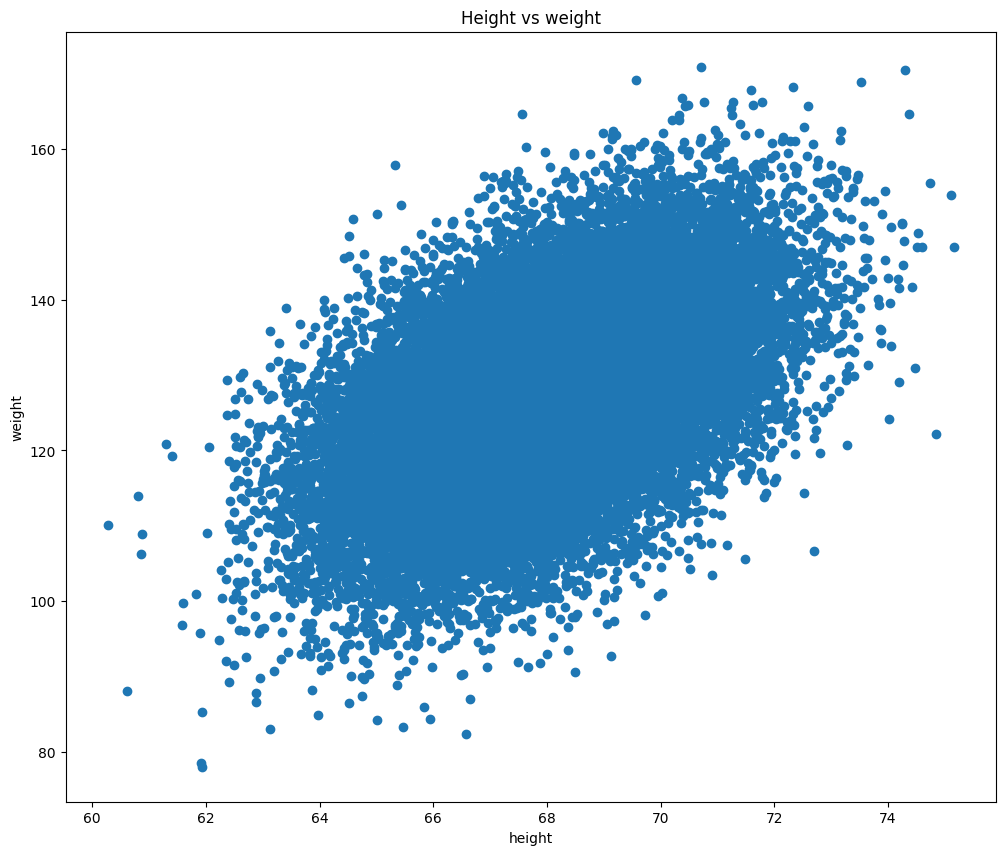

In [10]:
plt.figure(figsize=(12,10))
plt.scatter(df["height"],df["weight"])
plt.xlabel("height")
plt.ylabel("weight")
plt.title("Height vs weight")

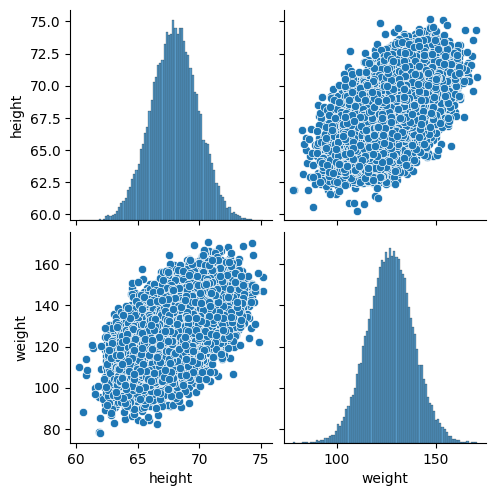

In [11]:
sns.pairplot(df)

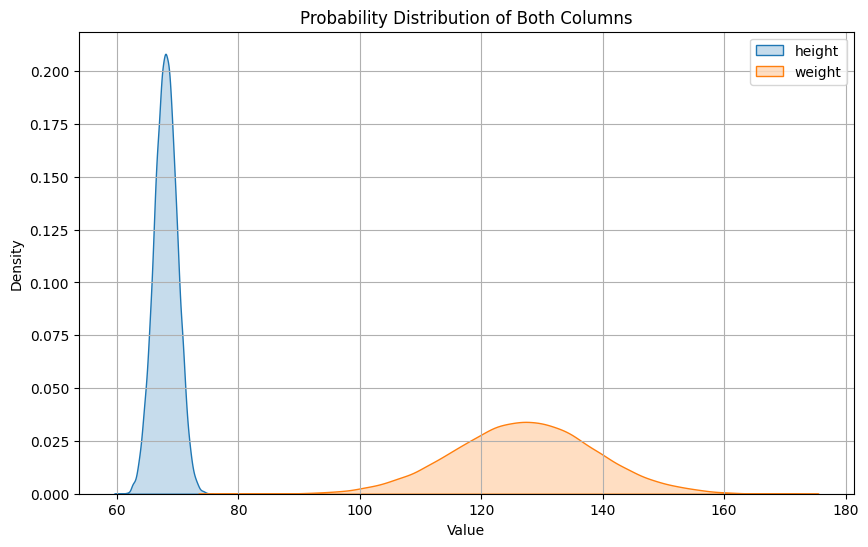

In [12]:
plt.figure(figsize=(10, 6))

for col in df.columns:
    sns.kdeplot(data=df, x=col, fill=True, label=col)

plt.title('Probability Distribution of Both Columns')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

In [13]:
from sklearn.model_selection import train_test_split
X = df[["height"]]
y = df["weight"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # kind of z-score formula used 
X_test = scaler.transform(X_test) # Here is only the transform as we will use the mean and sd of the test dataset; hence, it does not fit.

## Linear regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for linear regeression:",mae)
print("The MSE for linear regeression:",mse)
print("The R2 score for linear regeression:",r2)

The MAE for linear regeression: 8.034767997494628
The MSE for linear regeression: 102.48790963792533
The R2 score for linear regeression: 0.26059113512888576


## Lasso regression

In [16]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = Lasso()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for lasso:",mae)
print("The MSE for lasso:",mse)
print("The R2 score for lasso:",r2)

The MAE for lasso: 8.07177592543044
The MSE for lasso: 103.74495905633397
The R2 score for lasso: 0.25152203139912765


## Ridge regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = Ridge()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for Ridge:",mae)
print("The MSE for Ridge:",mse)
print("The R2 score for Ridge:",r2)

The MAE for Ridge: 8.034765719347703
The MSE for Ridge: 102.48797761401688
The R2 score for Ridge: 0.2605906447088464


## Elastic net regression

In [18]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regression = ElasticNet()
regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("The MAE for elastic net:",mae)
print("The MSE for elastic net:",mse)
print("The R2 score for elastic net:",r2)

The MAE for elastic net: 8.23589274721735
The MSE for elastic net: 108.32029146518549
The R2 score for elastic net: 0.2185128564165496
